# Lecture 5 - 유용한 기능들

양자 회로를 시뮬레이터나 실제 양자 장치에 실행 시키기 위해 Qiskit은 여러가지의 유용한 기능들을 제공합니다.

1. IBMQ 백엔드 정보
2. Qiskit 도구

## 1. IBMQ 백엔드 정보

백엔드의 정보에 대해 [Lecture 3 - 양자 회로 실행과 백엔드](https://github.com/QuantumComputingKorea/Qiskit-Dev-Cert-lectures/blob/main/Lecture3/Lecture%203%20-%20%EC%96%91%EC%9E%90%20%ED%9A%8C%EB%A1%9C%20%EC%8B%A4%ED%96%89%EA%B3%BC%20%EB%B0%B1%EC%97%94%EB%93%9C.ipynb)에서 어느정도 다뤘지만 이번 강의에서 내용을 추가를 하여 다시 한번 다뤄보겠습니다.

In [1]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

In [2]:
IBMQ.load_account()  # 계정을 로드합니다.

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## `IBMQ.providers()`

접근 가능한 백엔드 제공자들을 출력합니다.

In [3]:
IBMQ.providers()  # 사용 가능한 백엔드 제공자를 확인합니다.

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-internal', group='deployed', project='default')>]

## 계정에서 접근 가능한 백엔드 목록

접근 가능한 백엔드의 목록을 출력하기 위해 두가지의 방법이 있습니다.
1. `backend()`
2. `get_provider()`

In [4]:
ibmq_account = IBMQ.load_account() # 계정을 로드하여 ibmq_account로 지정합니다.

ibmqfactory.load_account:WARNING:2023-10-05 21:50:49,314: Credentials are already in use. The existing account in the session will be replaced.


***
`backends()`를 사용한 목록 출력
***

In [5]:
backends = ibmq_account.backends() # 사용 가능한 백엔드를 확인합니다.
backends

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]

***
`get_provider()`를 사용한 목록 출력
***

In [6]:
ibmq_provider = IBMQ.get_provider(hub='ibm-q') # ibm-q 허브를 가져옵니다.
ibmq_provider.backends() # 허브에 있는 백엔드를 확인합니다.

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]

이러한 목록 중에서 원하는 백엔드를 선택하여 양자 회로를 실행하고 싶으면 `get_backend`를 사용하거나 `backend.BACKENDNAME`을 사용할 수 있습니다.

In [7]:
backend = ibmq_account.get_backend('ibm_perth') # 백엔드를 지정합니다.
backend

<IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>

In [8]:
backend = ibmq_account.backend.ibm_perth # 백엔드를 지정합니다.
backend

<IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>

이러한 백엔드의 목록중 가장 대기열이 적은 백엔드를 찾기 위해서는 `least_bussy`를 사용할 수 있습니다.

In [9]:
least_busy(ibmq_provider.backends())

<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>

백엔드 목록중에 원하는 조건부를 넣어 백엔드를 필터링을 하여 찾을 수 있습니다. 이에 대한 자세한 내용은 지난 강의인 [Lecture 3 - 양자 회로 실행과 백엔드](https://github.com/QuantumComputingKorea/Qiskit-Dev-Cert-lectures/blob/main/Lecture3/Lecture%203%20-%20%EC%96%91%EC%9E%90%20%ED%9A%8C%EB%A1%9C%20%EC%8B%A4%ED%96%89%EA%B3%BC%20%EB%B0%B1%EC%97%94%EB%93%9C.ipynb)에서 자세히 알 수 있습니다.

## 2. Qiskit 도구

Qiskit에서는 양자 장치나 시뮬레이선에 보낸 장치를 모니터링 하거나 백엔드를 모니터링 할 수 있는 도구를 재공하고 있습니다. 대표적인 도구들은 아래와 같습니다.
1. `backend_overview()`
2. `backend_monitor()`
3. `job_monitor`

### `backend_overview()`

IBMQ 백엔드의 접근 가능한 전체적인 정보를 출력합니다.

In [10]:
least_busy(ibmq_provider.backends(simulator=False, operational=True)) # 시뮬레이터가 아니고 작동 중인 백엔드 중 가장 빠른 백엔드를 가져옵니다.
backend

<IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
from qiskit.tools import backend_overview # backend_overview를 불러옵니다.

In [12]:
backend_overview() # 백엔드의 전체적인 정보를 확인합니다.

ibm_cusco                    ibm_nazca                    ibm_sherbrooke
---------                    ---------                    --------------
Num. Qubits:  127            Num. Qubits:  127            Num. Qubits:  127
Pending Jobs: 20             Pending Jobs: 192            Pending Jobs: 147
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      131.5          Avg. T1:      197.7          Avg. T1:      262.8
Avg. T2:      109.2          Avg. T2:      128.6          Avg. T2:      166.4



ibm_auckland                 ibm_cairo                    ibm_algiers
------------                 ---------                    -----------
Num. Qubits:  27             Num. Qubits:  27             Num. Qubits:  27
Pending Jobs: 1              Pending Jobs: 134            Pending Jobs: 1
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True   

### `backend_monitor()`

하나의 IBMQ 백엔드의 정보를 출력합니다.

In [13]:
from qiskit.tools import backend_monitor # backend_monitor을 불러옵니다.

In [14]:
backend_monitor(backend) # 선택한 백엔드의 상태를 확인합니다.

ibm_perth
Configuration
-------------
    n_qubits: 7
    operational: True
    status_msg: active
    pending_jobs: 45
    backend_version: 1.2.8
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    qubit_channel_mapping: [['d0', 'm0', 'u1', 'u0'], ['u3', 'u2', 'u4', 'u5', 'd1', 'u1', 'm1', 'u0'], ['m2', 'u2', 'u4', 'd2'], ['u8', 'u3', 'd3', 'u5', 'u6', 'm3'], ['u7', 'm4', 'u9', 'd4'], ['u8', 'm5', 'u11', 'u7', 'u10', 'u9', 'd5', 'u6'], ['m6', 'u11', 'u10', 'd6']]
    parametric_pulses: ['gaussian', 'gaussian_square', 'gaussian_square_drag', 'drag', 'constant']
    conditional: False
    pulse_num_channels: 9
    memory: True
    credits_required: True
    clops: 2891
    n_registers: 1
    dt: 0.2222222222222222
    supported_features: ['qasm3', 'qobj']
    u_channel_lo: [[{'q': 1, 'scale': (1+0j)}], [{'q': 0, 'scale': (1+0j)}], [{'q': 2, 'scale': (1+0j)}], [{'q': 3, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)

### `job_monitor()`

백엔드에 보내진 양자 회로의 작업 상태를 모니터링 할 수 있게 해주는 도구 입니다.

In [15]:
from qiskit.tools import job_monitor # job_monitor를 불러옵니다.
from qiskit import *

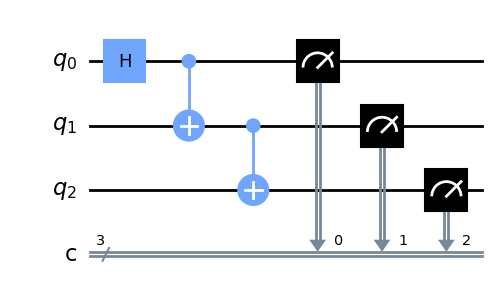

In [16]:
qc = QuantumCircuit(3,3) # 3개의 큐비트와 3개의 고전 비트를 가진 회로를 생성합니다.
qc.h(0) # 0번 큐비트에 하다마드 게이트를 적용합니다.
qc.cx(0,1) # 0번 큐비트와 1번 큐비트에 CNOT 게이트를 적용합니다.
qc.cx(1,2) # 1번 큐비트와 2번 큐비트에 CNOT 게이트를 적용합니다.
qc.measure([0,1,2],[0,1,2]) # 모든 큐비트를 측정합니다.
qc.draw(output='mpl') # 회로를 그립니다.

In [18]:
# job=execute(qc,backend,shots=1024) # 1024번의 샷을 실행합니다.
job = backend.retrieve_job('cmf7jc97kkp0008q0j80') # 백엔드에서 작업을 가져옵니다.

In [19]:
job_monitor(job) # 작업의 진행 상황을 확인합니다.

Job Status: job has successfully run


In [20]:
result=job.result() # 결과를 가져옵니다.
counts=result.get_counts() # 결과의 카운트를 가져옵니다.
print(counts) # 카운트를 출력합니다.

{'101': 5, '100': 20, '110': 44, '000': 479, '010': 6, '011': 24, '001': 19, '111': 427}


보낸 작업도 여러가지의 모듈을 이용하여 정보를 불러올 수 있습니다.
1. `job_id`: 작업의 Id를 불러옵니다.
2. `backend()`: 작업이 보내진 백엔드의 정보를 불러옵니다.
3. `result()`: 작업의 결과를 불러옵니다.
4. `status()`: 작업의 상태를 불러옵니다.

In [21]:
job.job_id()

'cmf7jc97kkp0008q0j80'

In [22]:
job.backend()

<IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>

In [23]:
job.result()

Result(backend_name='ibm_perth', backend_version='0.0.0', qobj_id='Unknown', job_id='circuit-runner_ckf7v6ih9ipuhtuisntg_d768_0', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x5': 5, '0x4': 20, '0x6': 44, '0x0': 479, '0x2': 6, '0x3': 24, '0x1': 19, '0x7': 427}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1], ['c', 2]], creg_sizes=[['c', 3]], global_phase=0.7853981633974483, memory_slots=3, metadata={}, n_qubits=7, name='circuit-0', qreg_sizes=[['q', 7]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6]]), status=done, meas_return=avg)], date=2023-10-05 18:24:38.295000+09:00, status=done, status=QobjHeader(backend_name='ibm_perth', backend_version='1.2.8'), execution_id='', time_taken=0.379387802, error=None, client_version={'qiskit': '0.29.1'})

In [24]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [25]:
import qiskit.tools.jupyter
%qiskit_version_table #qiskit 버전 표시하기

/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
